In [2]:
import numpy as np
import numpy.linalg as alg
import numpy.random as r
import scipy.linalg as alg
import scipy.sparse as spa
import torch
import torch.nn as nn
import functools
from matplotlib import pyplot as plt 
from matplotlib import cm
from time import time
from scipy.linalg import lu as lu
from scipy.linalg import solve_triangular as st
from scipy.linalg import solve_triangular as ss
from scipy.sparse.linalg import spsolve as sps
from torch.autograd import Variable
from torch.nn.utils import clip_grad_norm
from sys import getsizeof

# Plot issue

## Basic plot format: For casual numerical experiments

In [ ]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.plot(np.log10(h), np.log10(error))
ax.set_xlabel('log h')
ax.set_ylabel('log error')
#ax.axis([1750, 1800, -2.3, -0.6])
ax.set_title('Biased-difference + Double-precision',fontsize=12)
ax.legend(bbox_to_anchor = (0.7, 0.9), loc = 'upper left', borderaxespad = 0.)
plt.show()

## Basic plot format: For numerical experiments in paper work

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
import matplotlib
import seaborn as sns
  
sns.set(font_scale=1.3)
sns.set_style("darkgrid", {"axes.facecolor": ".95"})

import matplotlib.pyplot as plt


def Format_plot(x=None, y=None): 
    # plt.grid(False)
    ax = plt.gca()
    fig.subplots_adjust(bottom = 0.15, left=0.2)
    if x is not None:
        plt.xlabel(x, fontsize=20)
    if y is not None:
        plt.ylabel(y, fontsize=20)

def Finalize_plot(shape = (1.5, 1),legend_posi = (0.7, 0.9)):
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['figure.dpi']  = 300 
    plt.legend(bbox_to_anchor = legend_posi, loc = 'upper left', borderaxespad = 0.)
    plt.gcf().set_size_inches(
                                shape[0] * 1 * plt.gcf().get_size_inches()[1], 
                                shape[1] * 1 * plt.gcf().get_size_inches()[1])
    plt.tight_layout()

fig = plt.figure()
ax  = fig.add_subplot(111)
fig.subplots_adjust(bottom = 0.15, left=0.2)
ax.plot(np.log10(MSE_hist[1750:1799])/2, label = 'MSE')
ax.plot(np.log10(MNE_hist[1750:1799]), label = 'MNE')
ax.set_xlabel('epoch')
ax.set_ylabel('log-error')
ax.axis([0, 10, -2.3, -0.6])
#ax.axis([1750, 1800, -2.3, -0.6])
plt.legend(bbox_to_anchor = (0.7, 0.9), loc = 'upper left', borderaxespad = 0.)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
format_plot('epoch', 'log-error')
finalize_plot((0.85, 0.6))
plt.savefig('loss.jpg', dpi = 1000)
plt.show()

## Text in plt

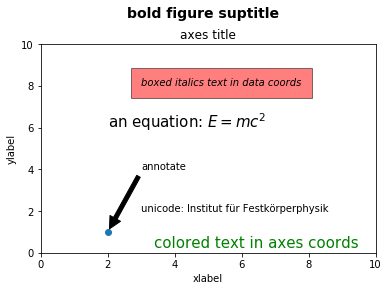

In [3]:
# Set titles for the figure and the subplot respectively
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
locs = ['center', 'left', 'right']
ax.set_title('Title with loc at '+loc, loc=loc, pad=30)
ax.set_xlabel('xlabel', labelpad = 12)              # labelpad is for moving the label position
ax.set_ylabel(r'$\int\ Y^2\ dt\ \ [V^2 s] \n$')     # also support latex


# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
# This set the range for plot instead of the label to display
ax.axis([0, 10, 0, 10]) 
# This sets the ticks rather than only the range
ax.xaxis.set_ticks(np.arange(0., 8.1, 2.))
ax.xaxis.set_major_formatter('{x:1.1f}')

# Also non-number of tick
import datetime
base = datetime.datetime(2017, 1, 1, 0, 0, 1)
time = [base + datetime.timedelta(days=x) for x in range(len(x1))]
ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70)

import matplotlib.dates as mdates
locator = mdates.DayLocator(bymonthday=[1, 15])
formatter = mdates.DateFormatter('%b %d')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70)


# Below is different type of text in plt
ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
ax.text(3, 2, 'unicode: Institut für Festkörperphysik')
ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)
ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))


# To change font
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('italic')

## Basic example of ploting 1D result

In [ ]:
plt.plot(x, y, label = r"$\sin(x)$", color = "red")
plt.plot(x, z, "b--", label = r"$\cos(x^2)$")
plot(x, y, color='green', marker='o', linestyle='dashed',
    ...      linewidth=2, markersize=12)

## Basic example of ploting 2D figure as image

In [ ]:
y,x = np.ogrid[-2:2:200j,-2:2:200j]
z = x * np.exp(-x**2-y**2)
extent = [np.min(x),np.max(x),np.min(y),np.max(y)]

plt.imshow(z,extent=extent,cmap=cm.hot)
plt.colorbar()
plt.show()

## Basic example of ploting 2D figure as surface

In [ ]:
x,y = np.mgrid[-2:2:20j,-2:2:20j]
z = x * np.exp(- x**2 - y**2)

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z,cmap=cm.ocean)
plt.show()

## Error-bar
### Error bar with skeleton

In [ ]:
MSE_hist_mean = np.mean(MSE_hist, 1)
fig, ax = plt.subplots()
fig.subplots_adjust(bottom = 0.15, left=0.2)
plt.errorbar(ratio, 
             np.log10(MSE_hist_mean) - np.log10(30), 
             yerr = [np.log10(np.max(MSE_hist, 1)) - np.log10(MSE_hist_mean), 
                     np.log10(MSE_hist_mean) - np.log10(np.min(MSE_hist, 1))], label = 'MSE', fmt='bo--')
ax.set_xlabel('ratio of boundary')
ax.set_ylabel('log-error')
plt.legend(bbox_to_anchor = (0.7, 0.9), loc = 'upper left', borderaxespad = 0.)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.savefig('loss-ratio1.jpg', dpi = 1000)
plt.show()

### Error bar with fill between

In [ ]:
# Shadow covers range 
def Errorbar_log_maxmin(xaxis, data, label):
    
    fig, ax  = plt.subplots()
    fig.subplots_adjust(bottom = 0.15, left=0.2)
    n1,n2,n3 = data.shape
    for i in range(n1):
        MSE_hist = data[i, :, :].reshape(n2, n3)
        MSE_hist_mean = np.mean(MSE_hist, 0)
        ax.set_yscale("log")
        ax.plot(xaxis, MSE_hist_mean, '.-')
        plt.fill_between(xaxis,  
                         np.max(MSE_hist, 0), 
                         np.min(MSE_hist, 0), label = label[i], alpha=0.2)

# Shadow covers [mean - std, mean + std]
def Errorbar_log_std(xaxis, data, label):
    
    fig, ax  = plt.subplots()
    fig.subplots_adjust(bottom = 0.15, left=0.2)
    n1,n2,n3 = data.shape
    for i in range(n1):
        MSE_hist = data[i, :, :].reshape(n2, n3)
        MSE_hist_mean = np.mean(MSE_hist, 0)
        MSE_hist_var  = np.var(MSE_hist, 0)
        ax.set_yscale("log")
        ax.plot(xaxis, MSE_hist_mean, '.-')
        plt.fill_between(xaxis,  
                         np.sqrt(MSE_hist_var) + MSE_hist_mean, 
                         MSE_hist_mean, label = label[i], alpha=0.2)

## Multiplot
### For imshow

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, 
                                                         ncols = 2, 
                                                         figsize = (4, 4), 
                                                         constrained_layout = True)
plt.rcParams['font.size'] = 8
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.dpi'] = 150
im = ax1.imshow(NNGPK, extent = extent, \
           cmap = cm.hot)
fig.colorbar(im, ax=ax1, shrink=0.6)
ax1.set_title("NNGPK: n = 100", fontsize=8)

im = ax2.imshow(NTK, extent = extent, \
           cmap = cm.hot)
#ax2.colorbar()
fig.colorbar(im, ax=ax2, shrink=0.6)
ax2.set_title("NTK: n = 100", fontsize=8)

### For plot

In [ ]:
plt.close('all')
fig = plt.figure()

ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)

plt.tight_layout()

plt.close('all')
fig = plt.figure()

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

plt.tight_layout()

## Plot fill_between figure, like a shadow, have a try!!!

In [ ]:
plt.fill_between(
    np.reshape(test_xs, (-1,)), 2 * std_dev, -2 * std_dev, alpha=0.4)

## An interesting example for subplot

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(5, 6), tight_layout=True)
locs = ['center', 'left', 'right']
for ax, loc in zip(axs, locs):
    ax.plot(x1, y1)
    ax.set_title('Title with loc at '+loc, loc=loc)
plt.show()

## Plot a table
Extremely useful when summarize the numerical experiments in a table

In [ ]:
for deg in range(1, 7):
    start = time()
    err   = np.zeros(2)
    for i in range(10):
        err = err + Conver(1, deg, 'u', 6, True)[0:2]
    #print('<td>',format((time() - start)/10,'.2e'),'</td>')
    print('<td>',format(err[0]/10,'.2e'),'</td>')
    print('<td>',format(err[1]/10,'.2e'),'</td>')

# Neural network

## Initialization of neural network

In [ ]:
def Init_model(layer = [1, 100, 1]):
    class NeuralNet(nn.Module):
        def __init__(self, layer):
            super(NeuralNet, self).__init__()
            nlayer    = layer.size
            network   = []
            for i in range(nlayer - 2):
                network += [nn.Linear(layer[i], layer[i + 1]), nn.Sigmoid()]
            network += [nn.Linear(layer[i + 1], layer[i + 2])]
            self.model = nn.Sequential(*network)

        def forward(self, x):
            return self.model(x) 
    return NeuralNet

def initNetParams(net):
    '''Init net parameters.'''
    for m in net.modules():
        if isinstance(m, nn.Conv2d):
            init.xavier_uniform(m.weight)
            if m.bias:
                init.constant(m.bias, 0)
        elif isinstance(m, nn.BatchNorm2d):
            init.constant(m.weight, 1)
            init.constant(m.bias, 0)
        elif isinstance(m, nn.Linear):
            init.normal(m.weight, std=1e-3)
            if m.bias:
                init.constant(m.bias, 0)

## More reliable random sample generation using random seed

In [ ]:
#from jax import random
key = random.PRNGKey(100)
train_points = 5
test_points = 50
noise_scale = 1e-1

target_fn = lambda x: np.sin(x)


key, x_key, y_key = random.split(key, 3)

train_xs = random.uniform(x_key, (train_points, 1), minval=-np.pi, maxval=np.pi)

train_ys = target_fn(train_xs)
train_ys += noise_scale * random.normal(y_key, (train_points, 1))

## Calculate the gradient of all the parameters in a nn

In [ ]:
# Return the gradient of all the parameters
def Mygrad(model, pred):
    model.zero_grad()
    pred.backward(retain_graph = True)
    grad_ = np.array([0])
    for p in model.parameters():
        n     = p.grad.numel()
        grad_ = np.hstack((grad_, p.grad.reshape(n)/np.sqrt(n)))
    model.zero_grad()       
    return grad_

# Numerical analysis and NPDE
## Generate randomly sampled data and uniform grid on $[0, 1] \times [0, 1]$
These codes are extremely useful when handle the problem of numerical analysis and NPDE

In [ ]:
def Generate_data(num_sample_int = 1000, num_sample_boundary = 100):
    # generate samples in the interior 
    X_int = torch.rand(num_sample_int, 2) * 2 - 1

    # generate samples on the boundary
    a_1 = np.ones((1, num_sample_boundary))
    b_1 = r.rand(1, num_sample_boundary) * 2 - 1
    a_2 = np.ones((1, num_sample_boundary)) * (-1)
    b_2 = r.rand(1, num_sample_boundary) * 2 - 1
    a_3 = r.rand(1, num_sample_boundary) * 2 - 1
    b_3 = np.ones((1, num_sample_boundary))
    a_4 = r.rand(1, num_sample_boundary) * 2 - 1
    b_4 = np.ones((1, num_sample_boundary)) * (-1)
    a = np.hstack((a_1, a_2, a_3, a_4))
    b = np.hstack((b_1, b_2, b_3, b_4))
    X_bound = np.vstack((a, b)).T
    X_bound = torch.from_numpy(X_bound).float()

    # construct labels for interior 
    Y_int = torch.ones(num_sample_int) * 2

    # construct labels for boundary
    Y_bound = 0.5 * (a**2 + b**2).T
    Y_bound = torch.from_numpy(Y_bound).float()
    
    x_int = X_int.to(device) 
    x_bound = X_bound.to(device)
    y_int = Y_int.to(device)
    y_bound = Y_bound.to(device)
    return [x_int, x_bound, y_int, y_bound]

def Generate_grid(meshsz = 30):
    meshx   = np.linspace(0, 1, meshsz)
    meshy   = np.linspace(0, 1, meshsz)
    xx, yy  = np.meshgrid(meshx, meshy)
    xy      = np.vstack([xx.reshape(1, meshsz * meshsz), yy.reshape(1, meshsz * meshsz)]).T
    xy      = torch.from_numpy(xy).float()
    xy      = xy.to(device)
    u_true  = pow(xy, 2).sum(1) / 2
    u_true  = u_true.reshape(meshsz, meshsz)
    return [xy, u_true]

## Calculate the convergence rate using linear regression

In [ ]:
x       = np.linspace(2, k + 1, k)
A       = np.vstack([x, np.ones(len(x))]).T
m1, c   = np.linalg.lstsq(A, np.log(error[:, 0]), rcond = -1)[0]

# Optimization

## Optimizing a complicated function via built-in function minimize in scipy.optimize
\begin{itemize}
    \item The basic procedure to minimize a function using the optimization package of scipy is to define the function, then minimize it using minimize().
    \item Do not use sympy in this case, even there is differentiation, since symbolic calculation is extremely slow.
    \item We can also use torch to minimize the function with torhc.optim, but in this case, we can not handle much special function such as Bessel function which is not a built-in function in torch.
    \item Use autograd to differentiate the function.
\end{itemize}

In [ ]:
from scipy.optimize import minimize
def res(x):
    return x[0]

x0 = np.array([0.1,0.1,0.1])
res = minimize(rosen, x0, method='nelder-mead',options={'xatol': 1e-1, 'disp': True,'maxiter':1000000})
# Matlab code is: fmincon(@likelihood,[0.1, 0.1, 0.1]), where likelihood is self-implemented function

Here is another method that combines sympy and minimization problem

In [ ]:
import sympy as sp
import mpmath as mp
vars = sp.var('x, y, z')
F = [x**2 + y**3 + z**4 - 6, x + y + z - 2, 3*x**2 + y - 5]
J = sp.Matrix(F).jacobian(vars)
f = lambda x0,y0,z0 : [Fc.subs(list(zip(vars, [x0,y0,z0]))) for Fc in F]
Jac = lambda x0,y0,z0 : J.subs(list(zip(vars, [x0,y0,z0]))).tolist()
start = [1, 1, 1]
print(mp.findroot(f, start, J = Jac))